# Practica Final: Crear una notebook 
## Nelson Posada Nava
### Esta actividad tiene como objetivo analizar un dataset de Pokémon para explorar las relaciones entre diversos atributos, como tipos, estadísticas de combate y categorías, permitiendo una comprensión más profunda de cómo se estructuran y evolucionan los Pokémon a lo largo de las generaciones.

In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

### Importación del dataset

In [2]:
df = pd.read_csv('datasets/Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Verificamos el total de pokemons de tipo 1

In [4]:
df['Type 1'].value_counts()

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64

### Verificamos el total de pokemons de tipo 2

In [5]:
df['Type 2'].value_counts()

Type 2
Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Ice         14
Rock        14
Water       14
Ghost       14
Fire        12
Electric     6
Normal       4
Bug          3
Name: count, dtype: int64

### Numero de pokemons legendarios

In [6]:
df['Legendary'].value_counts() 

Legendary
False    735
True      65
Name: count, dtype: int64

### Buscamos valores nulos en nuestra data

In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### llamamos al método describe

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,362.81375,208.343798,1.0,184.75,364.5,539.25,721.0
Total,800.0,435.10250,119.963040,180.0,330.00,450.0,515.00,780.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


### Método para llenar los valores nulos del tipo 2 con el tipo 1, ya que el Pokémon podría tener solo un tipo, en lugar de eliminar los valores nulos, podemos simplemente reemplazarlos con el tipo principal del Pokémon

In [9]:
def filltype():
    df['Type 2'].fillna(df['Type 1'],inplace = True)

### Ahora no hay valores nulos en nuestra data

In [10]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

### Ahora podemos generar una gráfica del número de Pokemons de fase 1

C:\Users\PC\AppData\Local\Temp\ipykernel_34880\2350672480.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




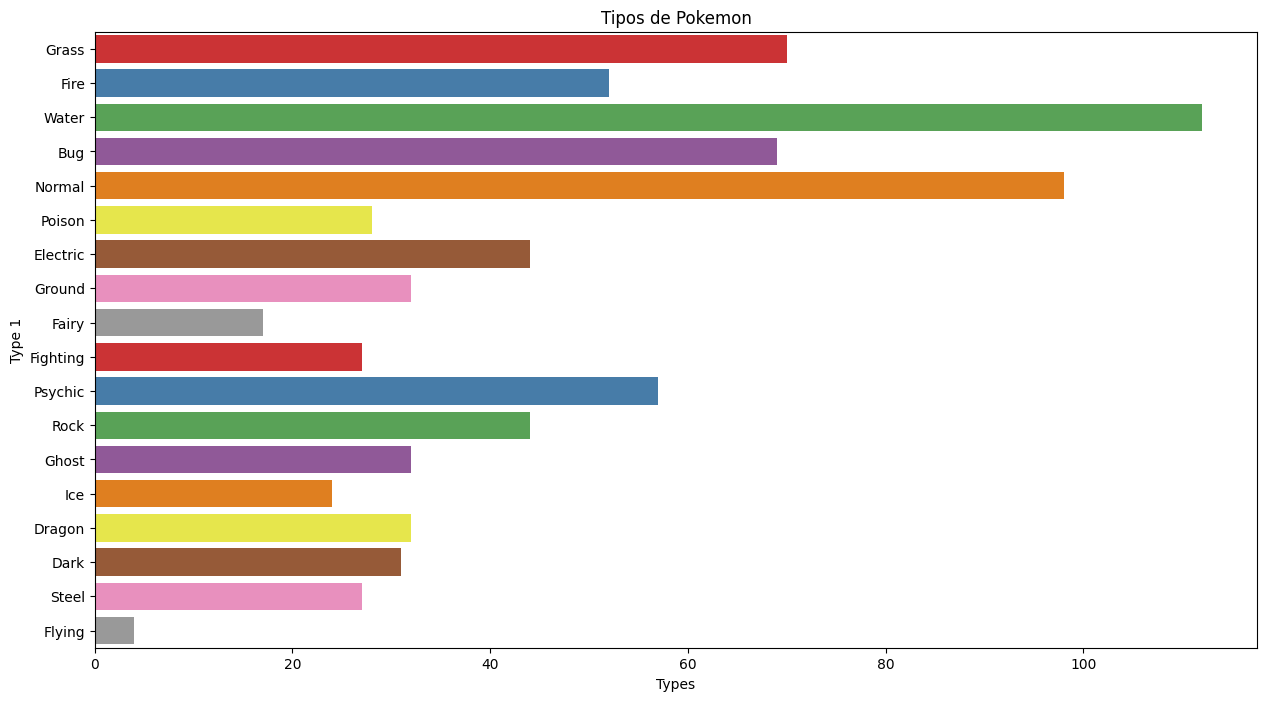

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(df['Type 1'],palette='Set1')
plt.xlabel('Types')
plt.title('Tipos de Pokemon')
plt.show()



### Total de Pokemons de fase 2

C:\Users\PC\AppData\Local\Temp\ipykernel_34880\3559289472.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




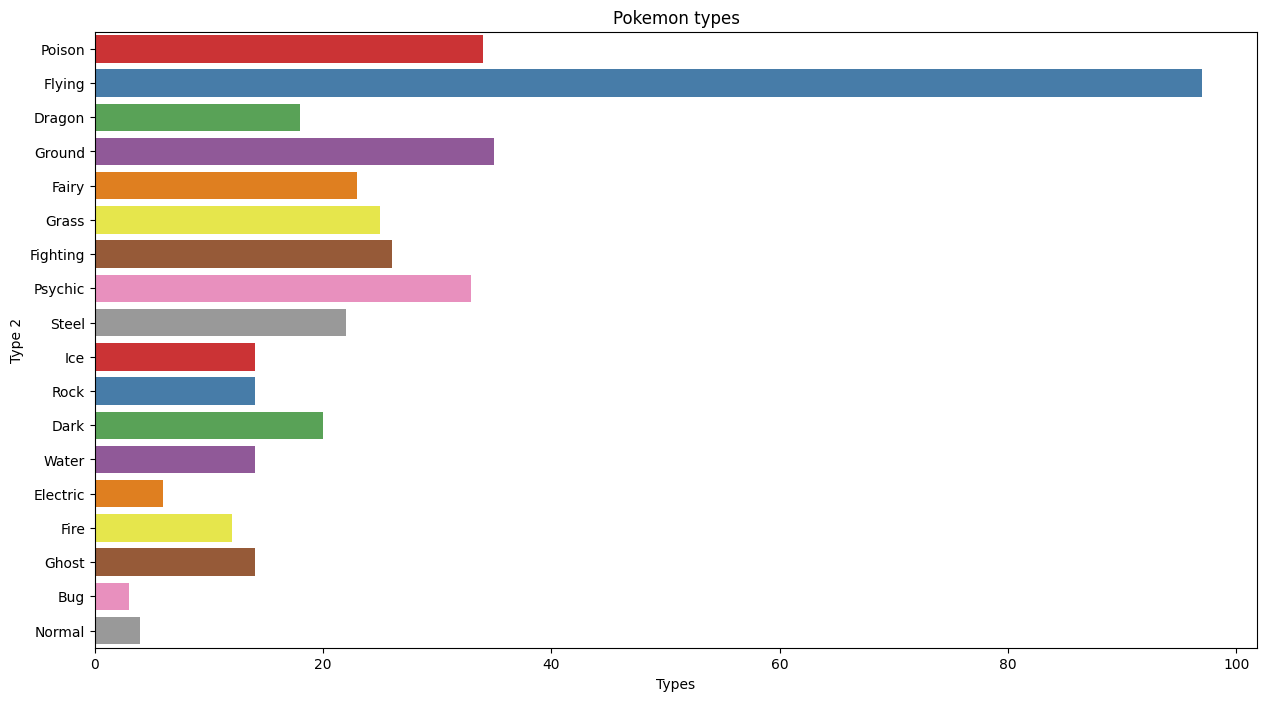

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(df['Type 2'],palette='Set1')
plt.xlabel('Types')
plt.title('Pokemon types')
plt.show()

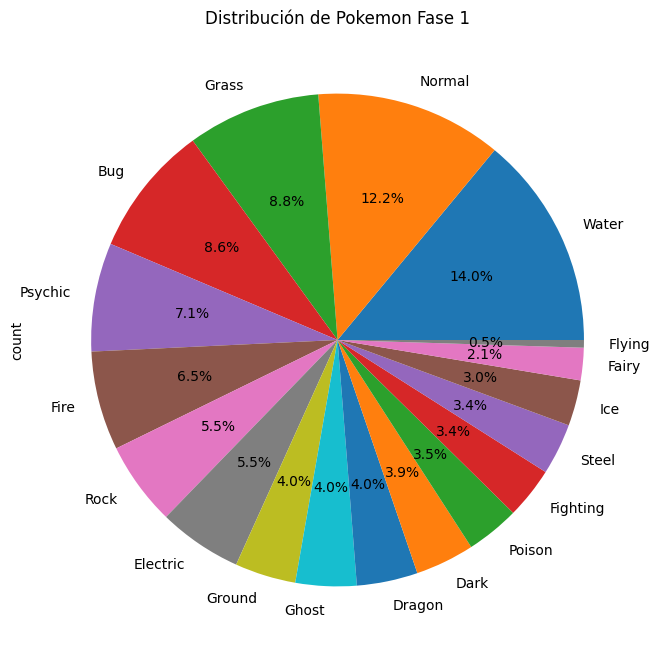

In [13]:
plt.title("Distribución de Pokemon Fase 1")
df['Type 1'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,8))
plt.show()

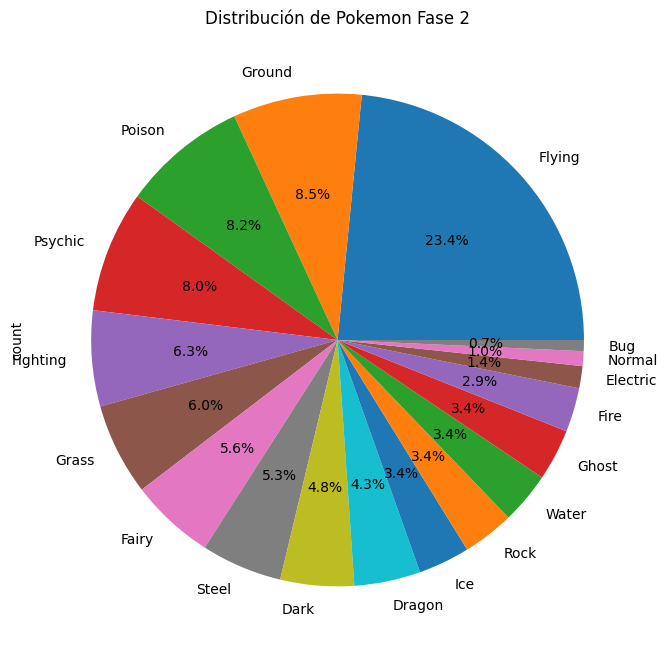

In [14]:
plt.title("Distribución de Pokemon Fase 2")
df['Type 2'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(15,8))
plt.show()

### Relación entre ataque y defensa

<Figure size 1500x800 with 0 Axes>

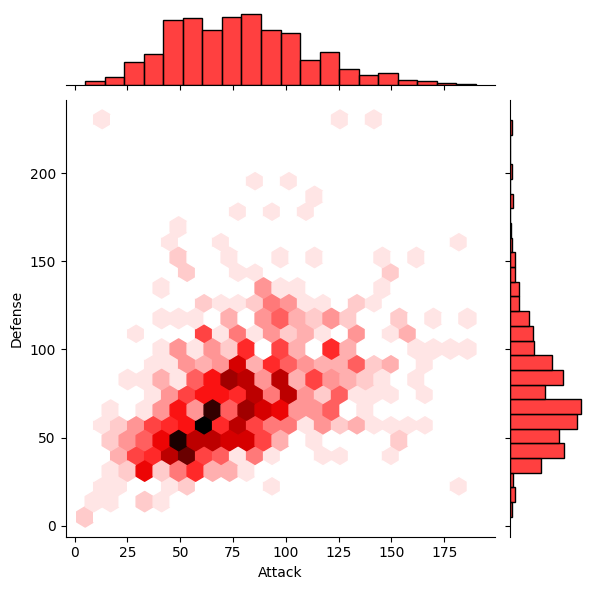

In [15]:
plt.figure(figsize=(15,8))
sns.jointplot(x="Attack",y="Defense",data=df,kind="hex",color="red");

<Axes: xlabel='Generation', ylabel='Attack'>

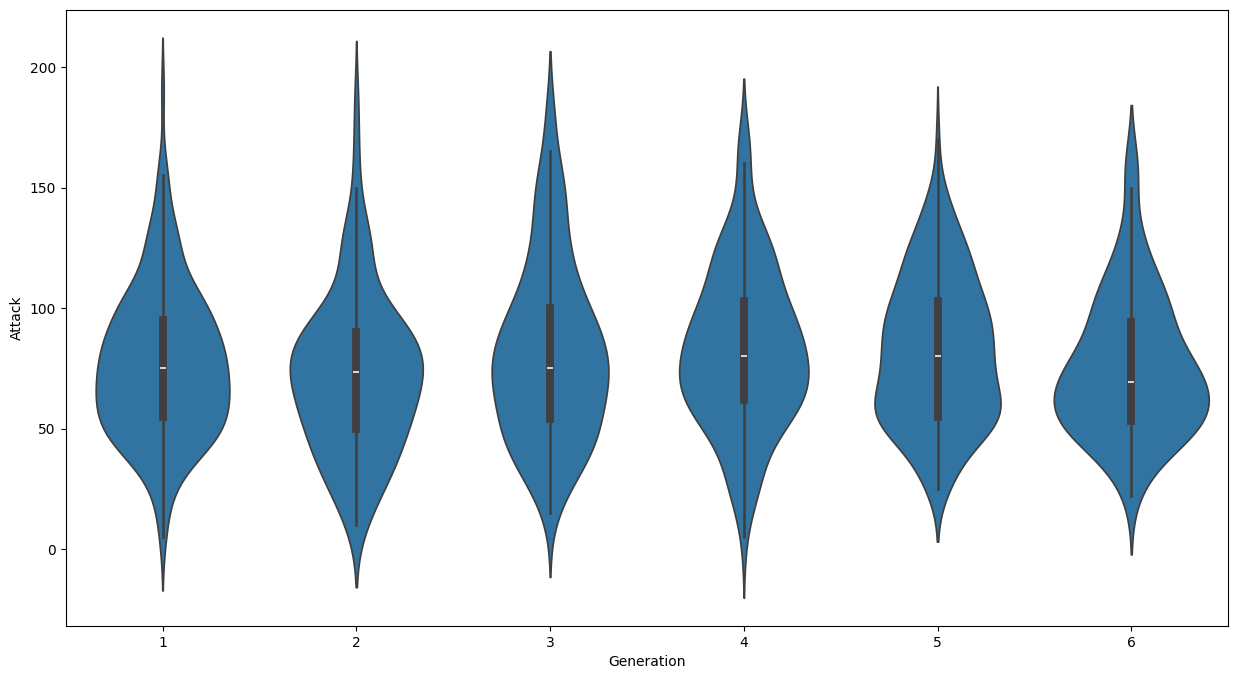

In [16]:
plt.figure(figsize=(15,8))
sns.violinplot(x="Generation",y="Attack",data = df)

<Axes: xlabel='Generation', ylabel='Defense'>

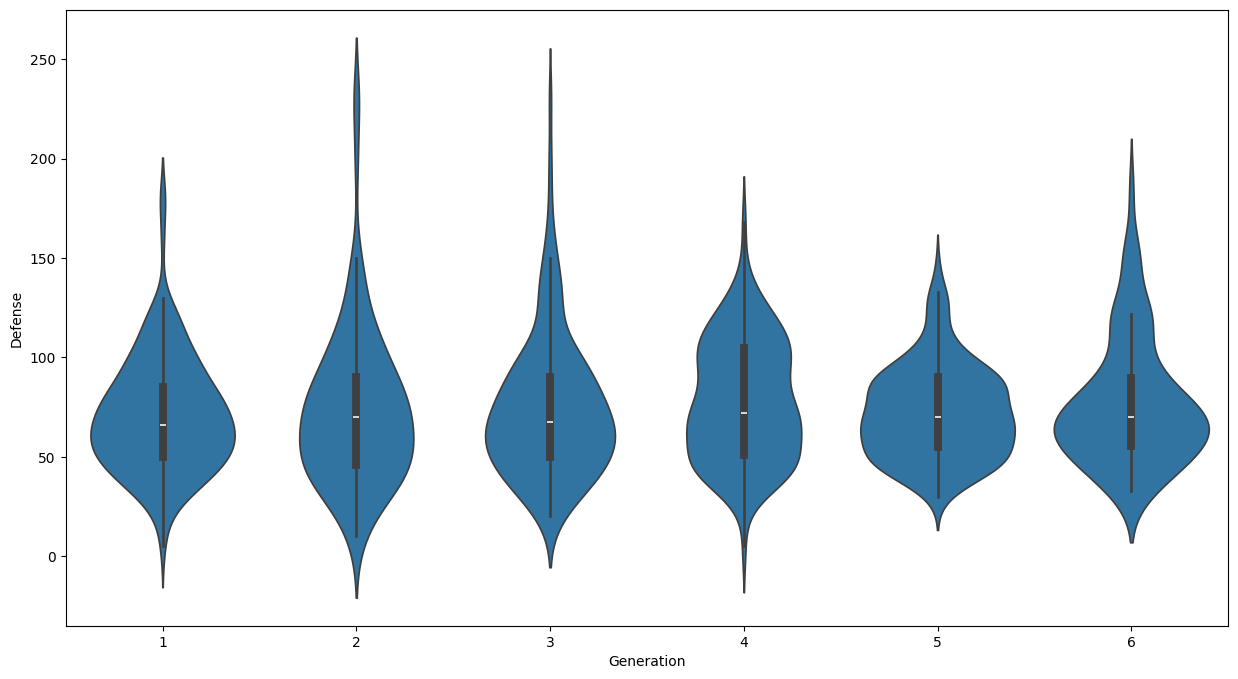

In [17]:
plt.figure(figsize=(15,8))
sns.violinplot(x="Generation",y="Defense",data = df)

### Comparación del puntaje de diferentes tipos en Fase 2

<Axes: xlabel='Type 2', ylabel='Total'>

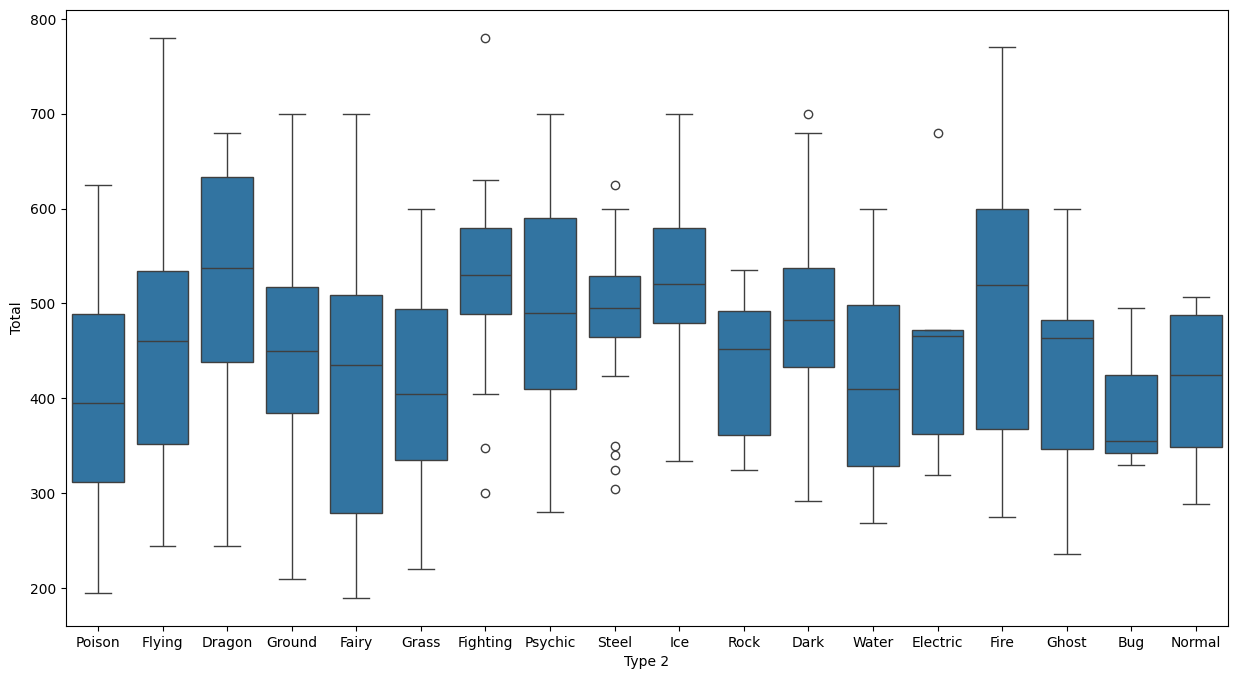

In [18]:
plt.figure(figsize=(15,8)) 
sns.boxplot(x = df['Type 2'],y = df['Total'])

### Comparación de atributos de Pokemons legendarios

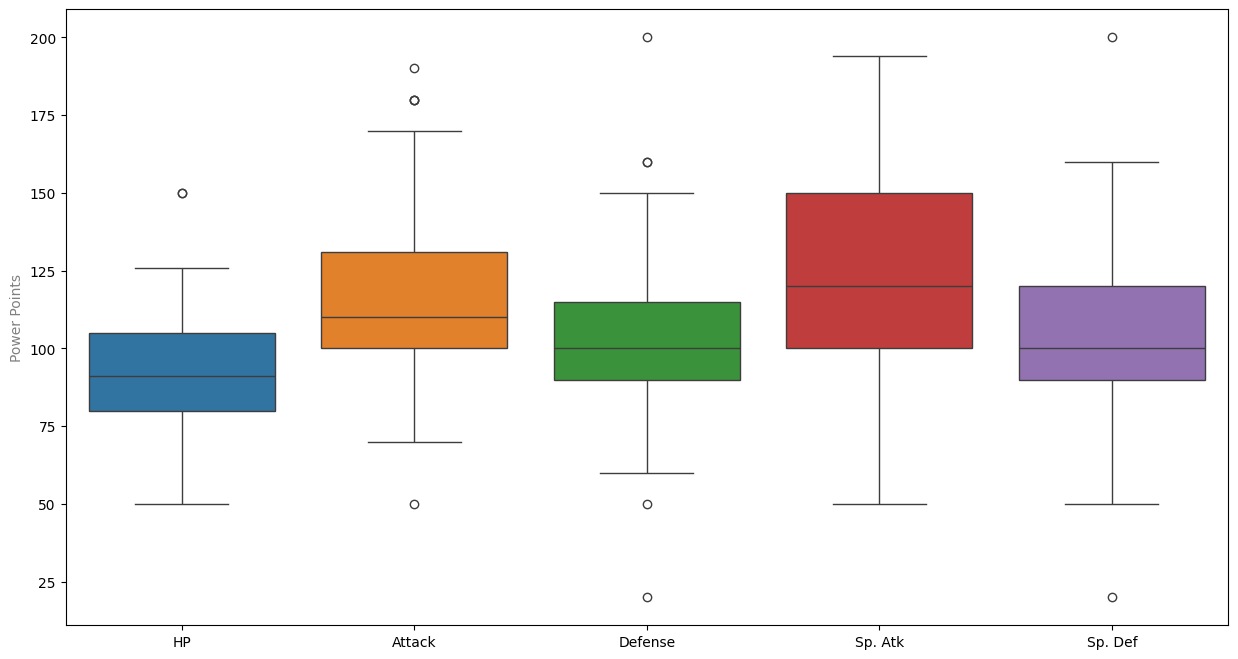

In [19]:
legend = df[df["Legendary"]]
legend = legend[["HP","Attack","Defense","Sp. Atk","Sp. Def"]]
fig = plt.figure(figsize= (15,8))
sns.boxplot(data=legend)
plt.ylabel("Power Points",color="grey")
plt.show()

### Distribución de legendarios dependiendo las generaciones

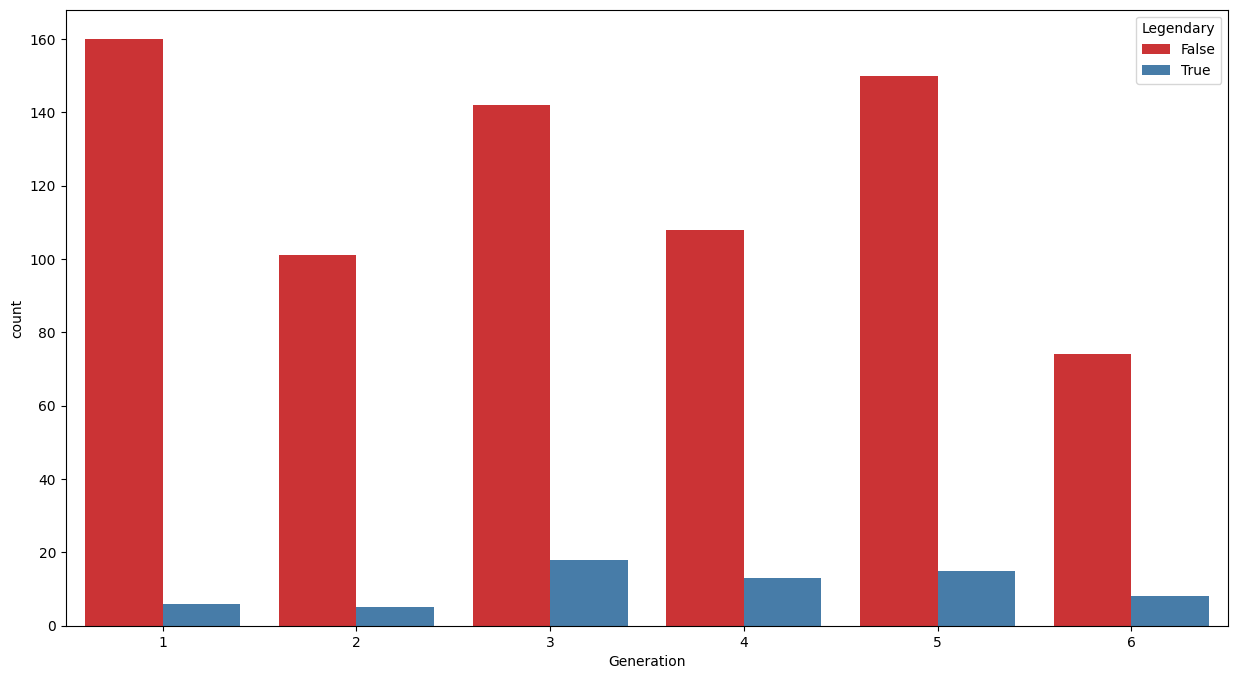

In [20]:
plt.figure(figsize=(15,8))
plot = sns.countplot(x='Generation',data=df,hue='Legendary',palette="Set1")

# Conclusiones

## El análisis muestra que el tipo de Pokémon más frecuente en la fase 1 es Agua, mientras que en la fase 2 predomina el tipo Volador. Además, la primera generación incluyó más Pokémon legendarios en comparación con las generaciones posteriores, lo que resalta su importancia histórica en la franquicia. Este análisis también permite explorar las relaciones entre atributos como ataque y defensa en relación con la regeneración (o recuperación), proporcionando una visión útil para estrategias de combate y equilibrio.